### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")

In [98]:
#application_df[(application_df['INCOME_AMT'] == '0') & (application_df['IS_SUCCESSFUL'] == 0)].head(20)

In [65]:
#application_df[(application_df['INCOME_AMT'] == '0') & (application_df['IS_SUCCESSFUL'] == 1)].head(20)

In [66]:
#fails_df = application_df[(application_df['IS_SUCCESSFUL'] == 0)]
#fails_df.shape

In [67]:
#success_df = application_df[(application_df['IS_SUCCESSFUL'] == 1)]
#success_df.shape

In [13]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df.head(5)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# ----------------------

In [82]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [83]:
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Determine which values to replace if counts are less than ...?
CNTS = application_df['APPLICATION_TYPE'].value_counts()
REPL = list(CNTS[CNTS < 500].index)

# Replace in dataframe
for app in REPL:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [85]:
application_df['AFFILIATION'].value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [86]:
# Determine which values to replace if counts are less than ...?
CNTS = application_df['AFFILIATION'].value_counts()
REPL = list(CNTS[CNTS < 15000].index)

# Replace in dataframe
for app in REPL:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [5]:
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [15]:
# Determine which values to replace if counts are less than ...?
CNTS = application_df['CLASSIFICATION'].value_counts()
REPL = list(CNTS[CNTS < 800].index)

# Replace in dataframe
for app in REPL:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [89]:
application_df['USE_CASE'].value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

In [11]:
# Determine which values to replace if counts are less than ...?
#CNTS = application_df['USE_CASE'].value_counts()
#REPL = list(CNTS[CNTS < 1000].index)

# Replace in dataframe
#for app in REPL:
#    application_df.USE_CASE = application_df.USE_CASE.replace(app,"Other")
    
# Check to make sure binning was successful
#application_df.USE_CASE.value_counts()

In [90]:
application_df['ORGANIZATION'].value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

In [13]:
# Determine which values to replace if counts are less than ...?
#CNTS = application_df['ORGANIZATION'].value_counts()
#REPL = list(CNTS[CNTS < 10000].index)

# Replace in dataframe
#for app in REPL:
#    application_df.ORGANIZATION = application_df.ORGANIZATION.replace(app,"Other")
    
# Check to make sure binning was successful
#application_df.ORGANIZATION.value_counts()

In [91]:
application_df['STATUS'].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [15]:
#application_df = application_df.loc[application_df['STATUS'] == 1]
#application_df.drop(columns=['STATUS'], inplace=True)

In [92]:
application_df['SPECIAL_CONSIDERATIONS'].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [93]:
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [17]:
def range_to_int(range_str):
    if range_str == "0":
        return 0
    elif range_str == "1-9999":
        return 9_999 
    elif range_str == "10000-24999":
        return 24_999 
    elif range_str == "25000-99999":
        return 99_999 
    elif range_str == "100000-499999":
        return 499_999 
    elif range_str == "500000-1000000":
        return 1_000_000 
    elif range_str == "500000-1M":
        return 1_000_000 
    elif range_str == "1M-5M":
        return 5_000_000
    elif range_str == "5M-10M":
        return 10_000_000 
    elif range_str == "10M-50M":
        return 50_000_000
    elif range_str == "50M+":
        return 100_000_000 
    else:
        return 11

application_df["INCOME_AMT"] = application_df["INCOME_AMT"].apply(range_to_int)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,499999,N,142590,1


In [8]:
#application_df['ASK_AMT'] = application_df['ASK_AMT'] // 5000
#application_df.head(5)
def encode_ask(ask):
    if ask < 9999:
        return 1 #return 9_999 // 5000
    elif ask < 24999:
        return 2 #return 24_999 // 5000
    elif ask < 99999:
        return 3 #return 99_999 // 5000
    elif ask < 499999:
        return 4 #return 499_999 // 5000
    elif ask < 1000000:
        return 5 #return 1_000_000 // 5000
    elif ask < 5000000:
        return 6 #return 5_000_000 // 5000
    elif ask < 10000000:
        return 7 #return 10_000_000 // 5000
    elif ask < 50000000:
        return 8 #return 50_000_000 // 5000
    else:
        return 9 #return 100_000_000 // 5000

application_df["ASK_AMT"] = application_df["ASK_AMT"].apply(encode_ask)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1,N,4,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,1,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,2,N,1,1
4,T3,Independent,C1000,Heathcare,Trust,1,4,N,4,1


In [20]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  3
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   1284
IS_SUCCESSFUL                2
dtype: int64

In [78]:
application_df.head(20)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1,N,21,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,1,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,4,N,1,1
4,T3,Independent,C1000,Heathcare,Trust,1,99,N,28,1
5,T3,Independent,C1200,Preservation,Trust,1,0,N,1,1
6,T3,Independent,C1000,Preservation,Trust,1,99,N,6,1
7,T3,Independent,C2000,Preservation,Trust,1,10000,N,1501,1
8,T7,Independent,C1000,ProductDev,Trust,1,1,N,18,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,1,0


In [21]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                 int64
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

<AxesSubplot:ylabel='Density'>

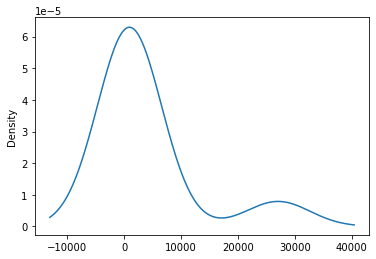

In [22]:
# Visualize the value counts of APPLICATION_TYPE
application_counts = application_df['APPLICATION_TYPE'].value_counts()
application_counts.plot.density()

In [23]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

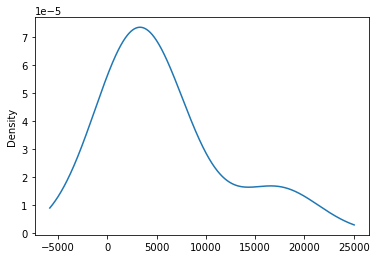

In [24]:
# Visualize the value counts of CLASSIFICATION
classification_counts = application_df['CLASSIFICATION'].value_counts()
classification_counts.plot.density()

In [18]:
# Generate our categorical variable lists
application_cat = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION','SPECIAL_CONSIDERATIONS']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
merged_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
merged_df.head()

,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,9999,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,0,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,24999,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,499999,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
merged_df.drop(columns=["IS_SUCCESSFUL"], axis=1, inplace=True)
X = merged_df.values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [29]:
import numpy as np
X_train = np.log(X_train)
X_test = np.log(X_test)
y_train = np.log(y_train)
y_test = np.log(y_test)

C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\bjile\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [12]:
# Create a StandardScaler instances
#scaler = StandardScaler()

# Fit the StandardScaler
#X_scaler = scaler.fit(X_train)

# Scale the data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)


In [22]:
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

### Deliverable 3: Optimize the Model

In [ ]:
merged_df[['ASK_AMT']]

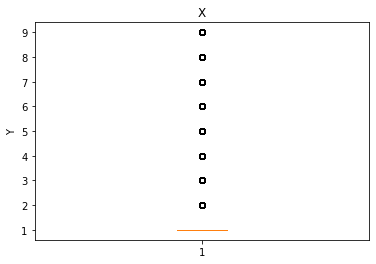

In [139]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('X')
ax1.set_ylabel('Y')
#ax1.boxplot(application_df.ASK_AMT)
ax1.boxplot(merged_df.ASK_AMT)

plt.show()

In [ ]:
#df_amt=application_df[['INCOME_AMT', 'ASK_AMT']]
#df_amt.plot.scatter(x='INCOME_AMT', y='ASK_AMT')

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=300, activation="relu", input_dim=35))
nn.add(tf.keras.layers.Dense(units=300, activation="relu"))
nn.add(tf.keras.layers.Dense(units=300, activation="relu"))
nn.add(tf.keras.layers.Dense(units=300, activation="relu"))

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               10800     
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 301       
Total params: 282,001
Trainable params: 282,001
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_opt",exist_ok=True)
checkpoint_path = "checkpoints_opt/weights_2.{epoch:02d}.hdf5"

In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) #, steps_per_execution=1000)

In [17]:
nn.load_weights("checkpoints_opt/weights.380.hdf5")


In [18]:
# Create a callback that saves the model's weights every epoch

cp_callback_opt = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)
    
    #save_freq='epoch')

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=1000, callbacks=[cp_callback_opt])

Epoch 1/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5384 - accuracy: 0.7460
Epoch 2/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5263 - accuracy: 0.7466
Epoch 3/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5227 - accuracy: 0.7468
Epoch 4/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5227 - accuracy: 0.7464
Epoch 5/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5226 - accuracy: 0.7469

Epoch 00005: saving model to checkpoints_opt\weights_2.05.hdf5
Epoch 6/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5222 - accuracy: 0.7468
Epoch 7/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5225 - accuracy: 0.7467
Epoch 8/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5264 - accuracy: 0.7451
Epoch 9/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5229 - accuracy: 0.7456
Epoch 10/1000
804/

804/804 [==============================] - 3s 4ms/step - loss: 0.5211 - accuracy: 0.7463
Epoch 72/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5226 - accuracy: 0.7457
Epoch 73/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5229 - accuracy: 0.7456
Epoch 74/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5224 - accuracy: 0.7464
Epoch 75/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5215 - accuracy: 0.7460

Epoch 00075: saving model to checkpoints_opt\weights_2.75.hdf5
Epoch 76/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.8107 - accuracy: 0.7411
Epoch 77/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5232 - accuracy: 0.7443
Epoch 78/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5213 - accuracy: 0.7453
Epoch 79/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5217 - accuracy: 0.7450
Epoch 80/1000
804/804 [

804/804 [==============================] - 2s 3ms/step - loss: 0.5294 - accuracy: 0.7430
Epoch 142/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5232 - accuracy: 0.7452
Epoch 143/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5220 - accuracy: 0.7448
Epoch 144/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5237 - accuracy: 0.7461
Epoch 145/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5225 - accuracy: 0.7463

Epoch 00145: saving model to checkpoints_opt\weights_2.145.hdf5
Epoch 146/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5409 - accuracy: 0.7454
Epoch 147/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5267 - accuracy: 0.7449
Epoch 148/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5222 - accuracy: 0.7455
Epoch 149/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5224 - accuracy: 0.7465
Epoch 150/1000

804/804 [==============================] - 3s 4ms/step - loss: 0.5297 - accuracy: 0.7450
Epoch 212/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5217 - accuracy: 0.7464
Epoch 213/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5230 - accuracy: 0.7450
Epoch 214/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5265 - accuracy: 0.7439
Epoch 215/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5275 - accuracy: 0.7441

Epoch 00215: saving model to checkpoints_opt\weights_2.215.hdf5
Epoch 216/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5216 - accuracy: 0.7458
Epoch 217/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5211 - accuracy: 0.7443
Epoch 218/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5211 - accuracy: 0.7459
Epoch 219/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5396 - accuracy: 0.7459
Epoch 220/1000

804/804 [==============================] - 3s 3ms/step - loss: 0.5294 - accuracy: 0.7342
Epoch 282/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5277 - accuracy: 0.7325
Epoch 283/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5261 - accuracy: 0.7334
Epoch 284/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5262 - accuracy: 0.7364
Epoch 285/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5246 - accuracy: 0.7460

Epoch 00285: saving model to checkpoints_opt\weights_2.285.hdf5
Epoch 286/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5240 - accuracy: 0.7457
Epoch 287/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5241 - accuracy: 0.7455
Epoch 288/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5235 - accuracy: 0.7461
Epoch 289/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5227 - accuracy: 0.7460
Epoch 290/1000

804/804 [==============================] - 2s 3ms/step - loss: 0.5230 - accuracy: 0.7460
Epoch 352/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5232 - accuracy: 0.7453
Epoch 353/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5225 - accuracy: 0.7446
Epoch 354/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5235 - accuracy: 0.7458
Epoch 355/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5231 - accuracy: 0.7457

Epoch 00355: saving model to checkpoints_opt\weights_2.355.hdf5
Epoch 356/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5213 - accuracy: 0.7458
Epoch 357/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5316 - accuracy: 0.7462
Epoch 358/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5221 - accuracy: 0.7462
Epoch 359/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5219 - accuracy: 0.7462
Epoch 360/1000

804/804 [==============================] - 2s 3ms/step - loss: 0.5206 - accuracy: 0.7465
Epoch 422/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5223 - accuracy: 0.7459
Epoch 423/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5207 - accuracy: 0.7465
Epoch 424/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5229 - accuracy: 0.7459
Epoch 425/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5294 - accuracy: 0.7438

Epoch 00425: saving model to checkpoints_opt\weights_2.425.hdf5
Epoch 426/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5254 - accuracy: 0.7442
Epoch 427/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5236 - accuracy: 0.7453
Epoch 428/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5209 - accuracy: 0.7460
Epoch 429/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5259 - accuracy: 0.7463
Epoch 430/1000

804/804 [==============================] - 2s 3ms/step - loss: 0.5286 - accuracy: 0.7448
Epoch 492/1000
804/804 [==============================] - 17033s 21s/step - loss: 0.5227 - accuracy: 0.7458
Epoch 493/1000
804/804 [==============================] - 7s 8ms/step - loss: 0.5221 - accuracy: 0.7453
Epoch 494/1000
804/804 [==============================] - 4s 5ms/step - loss: 0.5262 - accuracy: 0.7454
Epoch 495/1000
804/804 [==============================] - 4s 5ms/step - loss: 0.5241 - accuracy: 0.7438

Epoch 00495: saving model to checkpoints_opt\weights_2.495.hdf5
Epoch 496/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5281 - accuracy: 0.7425
Epoch 497/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5219 - accuracy: 0.7460
Epoch 498/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5232 - accuracy: 0.7456
Epoch 499/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5234 - accuracy: 0.7461: 0s - loss

804/804 [==============================] - 2s 3ms/step - loss: 0.5320 - accuracy: 0.7431

Epoch 00560: saving model to checkpoints_opt\weights_2.560.hdf5
Epoch 561/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5318 - accuracy: 0.7428
Epoch 562/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5265 - accuracy: 0.7428
Epoch 563/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5422 - accuracy: 0.7413
Epoch 564/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5284 - accuracy: 0.7408
Epoch 565/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5259 - accuracy: 0.7427

Epoch 00565: saving model to checkpoints_opt\weights_2.565.hdf5
Epoch 566/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5263 - accuracy: 0.7442
Epoch 567/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5274 - accuracy: 0.7430
Epoch 568/1000
804/804 [=============================

804/804 [==============================] - 3s 4ms/step - loss: 0.5243 - accuracy: 0.7445
Epoch 630/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5232 - accuracy: 0.7449

Epoch 00630: saving model to checkpoints_opt\weights_2.630.hdf5
Epoch 631/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5224 - accuracy: 0.7444
Epoch 632/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5262 - accuracy: 0.7438
Epoch 633/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5293 - accuracy: 0.7440
Epoch 634/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5241 - accuracy: 0.7449
Epoch 635/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5249 - accuracy: 0.7431

Epoch 00635: saving model to checkpoints_opt\weights_2.635.hdf5
Epoch 636/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5232 - accuracy: 0.7437
Epoch 637/1000
804/804 [=============================

804/804 [==============================] - 5s 6ms/step - loss: 0.5230 - accuracy: 0.7458
Epoch 699/1000
804/804 [==============================] - 5s 6ms/step - loss: 0.5228 - accuracy: 0.7456
Epoch 700/1000
804/804 [==============================] - 4s 4ms/step - loss: 0.5215 - accuracy: 0.7467

Epoch 00700: saving model to checkpoints_opt\weights_2.700.hdf5
Epoch 701/1000
804/804 [==============================] - 4s 6ms/step - loss: 0.5237 - accuracy: 0.7461: 0s - loss:
Epoch 702/1000
804/804 [==============================] - 4s 5ms/step - loss: 0.5281 - accuracy: 0.7464
Epoch 703/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5234 - accuracy: 0.7456
Epoch 704/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5213 - accuracy: 0.7465
Epoch 705/1000
804/804 [==============================] - 3s 4ms/step - loss: 0.5225 - accuracy: 0.7458

Epoch 00705: saving model to checkpoints_opt\weights_2.705.hdf5
Epoch 706/1000
804/804 [=================

804/804 [==============================] - 3s 4ms/step - loss: 0.5214 - accuracy: 0.7464
Epoch 769/1000
804/804 [==============================] - 4s 5ms/step - loss: 0.5219 - accuracy: 0.7464
Epoch 770/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5232 - accuracy: 0.7470

Epoch 00770: saving model to checkpoints_opt\weights_2.770.hdf5
Epoch 771/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5481 - accuracy: 0.7347
Epoch 772/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5360 - accuracy: 0.7457
Epoch 773/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5232 - accuracy: 0.7462
Epoch 774/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5212 - accuracy: 0.7465
Epoch 775/1000
804/804 [==============================] - 2s 3ms/step - loss: 0.5204 - accuracy: 0.7470

Epoch 00775: saving model to checkpoints_opt\weights_2.775.hdf5
Epoch 776/1000
804/804 [=============================

804/804 [==============================] - 4s 5ms/step - loss: 0.5213 - accuracy: 0.7468
Epoch 839/1000
804/804 [==============================] - ETA: 0s - loss: 0.5244 - accuracy: 0.74 - 4s 5ms/step - loss: 0.5241 - accuracy: 0.7465
Epoch 840/1000
804/804 [==============================] - 4s 5ms/step - loss: 0.5219 - accuracy: 0.7453

Epoch 00840: saving model to checkpoints_opt\weights_2.840.hdf5
Epoch 841/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5202 - accuracy: 0.7455
Epoch 842/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5203 - accuracy: 0.7466
Epoch 843/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5222 - accuracy: 0.7460
Epoch 844/1000
804/804 [==============================] - 3s 3ms/step - loss: 0.5209 - accuracy: 0.7455
Epoch 845/1000
608/804 [=====================>........] - ETA: 0s - loss: 0.5206 - accuracy: 0.7472

KeyboardInterrupt: 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

# Optimization

In [176]:
# Create a method that creates a new Sequential model with hyperparameter options

def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=70,
        max_value=140,
        step=10), activation=activation, input_dim=35))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 8)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=35,
            max_value=140,
            step=10),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [177]:
# Import the kerastuner library
import keras_tuner as kt

# Create a `Hyperband()` tuner instance
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2,
    overwrite=True)

In [178]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 01m 06s]
val_accuracy: 0.7295626997947693

Best val_accuracy So Far: 0.731195330619812
Total elapsed time: 00h 57m 19s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# Get top 3 model hyperparameters and print the values
best_hypers = []
for ii in range(1,4):
    best_hyper = tuner.get_best_hyperparameters(ii)[0]
    print(best_hyper.values)
    best_hypers.append(best_hyper)

In [ ]:
# Evaluate the top 3 models against the test dataset
best_models = []
for ii in range(1,4):
    best_model = tuner.get_best_models(ii)[0]
    model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
    best_models.append(best_model)

In [ ]:
X_test_scaled

# WTF

In [ ]:
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=160, activation="tanh", input_dim=43))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=80, activation="tanh"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=80, activation="tanh"))

# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=80, activation="tanh"))

# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=40, activation="tanh"))
# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=40, activation="tanh"))
# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=40, activation="tanh"))
# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=20, activation="tanh"))
# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=20, activation="tanh"))
# Fourth hidden layer
nn3.add(tf.keras.layers.Dense(units=20, activation="tanh"))

# Fifth hidden layer
nn3.add(tf.keras.layers.Dense(units=10, activation="tanh"))

# Sixth hidden layer
nn3.add(tf.keras.layers.Dense(units=5, activation="tanh"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

In [ ]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
fit_model = nn3.fit(X_train_scaled, y_train, epochs=500)